In [2]:
import pandas as pd
import numpy as mp

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [ ]:
# Load the dataset
df = pd.read_csv('data/boston.csv')

# Display basic info
df.info()
df.sample(5)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB

Missing values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


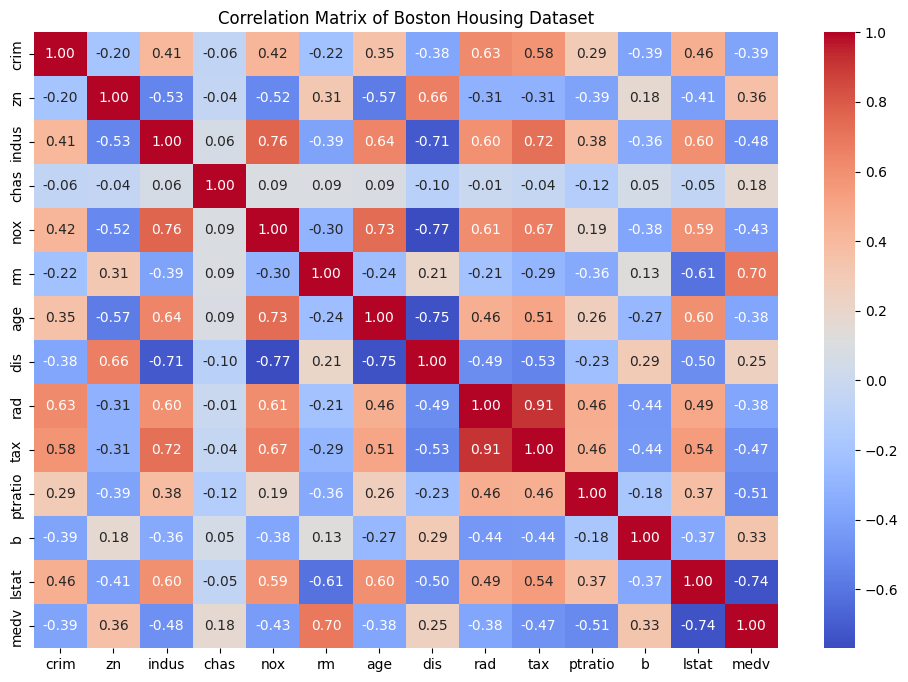

In [ ]:
# VExplore correlation between features 
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Boston Housing Dataset')
plt.show()

In [6]:
# Focus on the tarjet variable 'medv'
corr_matrix = df.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

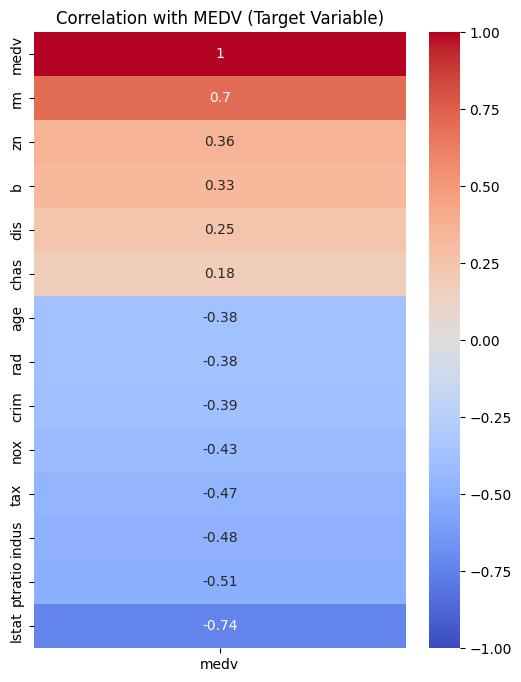

In [ ]:
# Visualize correlation with target variable 'medv'
plt.figure(figsize=(6, 8))
corr_target = df.corr()[['medv']].sort_values(by='medv', ascending=False)

sns.heatmap(corr_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with MEDV (Target Variable)')
plt.show()

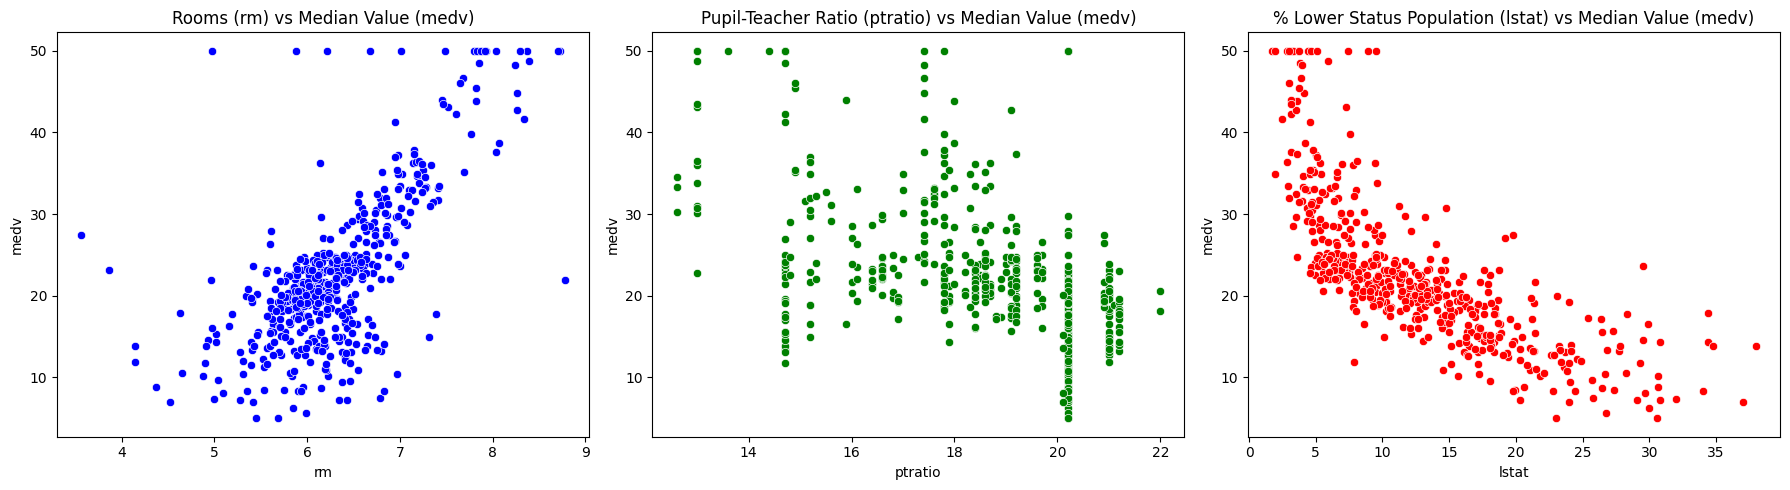

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# RM vs MEDV
sns.scatterplot(x='rm', y='medv', data=df, ax=axs[0], color='blue')
axs[0].set_title('Rooms (rm) vs Median Value (medv)')

# PTRATIO vs MEDV
sns.scatterplot(x='ptratio', y='medv', data=df, ax=axs[1], color='green')
axs[1].set_title('Pupil-Teacher Ratio (ptratio) vs Median Value (medv)')

# LSTAT vs MEDV
sns.scatterplot(x='lstat', y='medv', data=df, ax=axs[2], color='red')
axs[2].set_title('% Lower Status Population (lstat) vs Median Value (medv)')

plt.tight_layout()
plt.show()

In [9]:
# simple linear regression 
X = sm.add_constant(df['lstat'])  
Y = df['medv']
model = sm.OLS(Y, X).fit()  

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 03 Aug 2025   Prob (F-statistic):           5.08e-88
Time:                        19:32:26   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

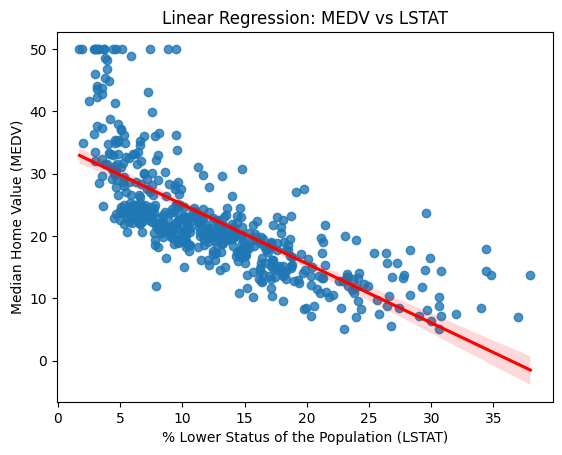

In [10]:
# Visualize the regression line
sns.regplot(x='lstat', y='medv', data=df, line_kws={"color": "red"})
plt.title('Linear Regression: MEDV vs LSTAT')
plt.xlabel('% Lower Status of the Population (LSTAT)')
plt.ylabel('Median Home Value (MEDV)')
plt.show()

In [ ]:
# Multiple linear regression